# Analyse Exploratoire

### Import des modules

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import my_functions
import numpy as np
from pandas.api.types import CategoricalDtype
from scipy import stats
import mlflow
import mlflow.sklearn
import importlib
importlib.reload(my_functions)

<module 'my_functions' from 'c:\\Users\\Maeva\\Documents\\OpenClassRoom\\P6_Machine Learning\\p6_machine_learning\\Notebooks\\my_functions.py'>

### Analyse Exploratoire

In [306]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [307]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [308]:
building_consumption.shape

(3376, 46)

In [309]:
building_consumption.duplicated("OSEBuildingID").sum()

np.int64(0)

In [310]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

#### Description du dataset

In [311]:
# création d'un tableau de suivi de sélection des colonnes
suivi_colonnes = pd.DataFrame({
    'nom_colonne': building_consumption.columns,
    'selection': ['' for _ in building_consumption.columns],  
    'commentaires': ['' for _ in building_consumption.columns],
    'description': ['' for _ in building_consumption.columns]
})

add_com = []

#Description du Dataset
suivi_colonnes['description'] = ['Identifiant','Année de la donnée','Catégorie de batiment','Type principal de propriété','Nom de la propriété','Adresse','Ville','Etat','Code postal',
                                 'Identifiant la parcelle pour taxes','Code du district','Quartier','Latitude','Longitude','Année de construction','Nombre de bâtiments',"Nombre d'étages",
                                 'Surface totale','Surface de stationnement','Surface du bâtiment',"Liste des types d'utilisation de la propriété","Utilisation principale",
                                 "Surface de l'utilisation principale","Utilisation secondaire","Surface de l'utilisation secondaire","Utilisation tertiaire",
                                 "Surface de la troisième utilisation","Nombre d'années certifié ENERGY STAR","Score ENERGY STAR",
                                 "Intensité d'utilisation énergétique sur site par surface","Intensité d'utilisation énergétique sur site par surface - conditions climatiques",
                                 "Intensité d'utilisation énergétique à la source par surface","Intensité d'utilisation énergétique à la source par surface - conditions climatiques",
                                 "Consommation énergétique totale sur site","Consommation énergétique totale sur site - conditions climatiques","Consommation de vapeur (en kBtu)",
                                 "Consommation d'électricité (en kWh)","Consommation d'électricité (en kBtu)","Consommation de gaz naturel (en therms)","Consommation de gaz naturel (en kBtu)",
                                 "Indicateur valeurs par défaut ou estimations","Commentaires","Statut de conformité réglementaire ou environnementale du bâtiment","Outliers repérés",
                                 "Émissions totales de gaz à effet de serre","Intensité des émissions de gaz à effet de serre"]

#### Valeurs manquantes

In [312]:
#Calcul des valeurs manquantes
Total_nan = my_functions.calculate_nan(building_consumption)

Total_nan

,NaN counts,Str nan counts,Empty counts,Space counts,Total NaN,% NaN
OSEBuildingID,0,0,0,0,0,0.00
DataYear,0,0,0,0,0,0.00
BuildingType,0,0,0,0,0,0.00
PrimaryPropertyType,0,0,0,0,0,0.00
PropertyName,0,0,0,0,0,0.00
Address,0,0,0,0,0,0.00
City,0,0,0,0,0,0.00
State,0,0,0,0,0,0.00
ZipCode,16,0,0,0,16,0.47
TaxParcelIdentificationNumber,0,0,0,0,0,0.00


In [313]:
#Suppression de la colonne vide Comments
add_com = ["Comments"]

suivi_colonnes.loc[suivi_colonnes["nom_colonne"].isin(add_com), ["selection","commentaires"]] = ["non","colonne vide"]

building_consumption = building_consumption.drop(columns=add_com)
building_consumption.shape

(3376, 45)

In [314]:
#Suppression des colonnes ayant trop peu de données
add_com = ["SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA","YearsENERGYSTARCertified","ENERGYSTARScore"]

suivi_colonnes.loc[suivi_colonnes["nom_colonne"].isin(add_com), ["selection","commentaires"]] = ["non","trop peu de donnees"]

building_consumption = building_consumption.drop(columns=add_com)
building_consumption.shape

(3376, 39)

#### Variable cible

**Variable cible :** SiteEUI(kBtu/sf) (mesure de la quantité d'énergie utilisée par unité de surface.)

In [315]:
# Identification de la variable cible
add_com = ["SiteEUI(kBtu/sf)"]

suivi_colonnes.loc[suivi_colonnes["nom_colonne"].isin(add_com), ["selection", "commentaires"]] = ["oui", "cible"]

In [316]:
#Identification des lignes pour lesquelles la variable cible est nulle
building_consumption[building_consumption["SiteEUI(kBtu/sf)"].isnull()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0,1978200105,...,0.0,0.0,0.0,0.0,0.0,False,Non-Compliant,NaN,0.0,0.0
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0,0939000245,...,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN,NaN
758,19798,2016,Multifamily LR (1-4),Low-Rise Multifamily,SANDHURST APTS,7239 SAND POINT WAY NE,Seattle,WA,98115.0,0225049032,...,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN,NaN
1549,22363,2016,Multifamily LR (1-4),Low-Rise Multifamily,Forte Condominium,840 NE 125th St,Seattle,WA,98125.0,2607980000,...,0.0,0.0,0.0,0.0,0.0,False,Non-Compliant,NaN,0.0,0.0
1792,23437,2016,Multifamily LR (1-4),Low-Rise Multifamily,MERCER CREST APT,500 W MERCER ST,Seattle,WA,98119.0,3876900230,...,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN,NaN
2474,25752,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRANVIEW APARTMENTS,1120 N 93RD ST,Seattle,WA,98103.0,9267200155,...,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN,NaN
2670,26532,2016,NonResidential,Mixed Use Property,KALBERG BUILDING,4515 UNIVERSITY WAY NE,Seattle,WA,98105.0,8816401120,...,NaN,NaN,NaN,NaN,NaN,False,Non-Compliant,NaN,NaN,NaN


<li> 4 bâtiments résidenciels à supprimer
<li> 3 bâtiments pour lesquelles toutes les données d'énergie manquent

In [317]:
#Suppression des lignes avec valeurs manquantes pour la variable cible
building_consumption = building_consumption[~building_consumption['SiteEUI(kBtu/sf)'].isnull()]
building_consumption.shape

(3369, 39)

#### Nettoyage données

##### Valeurs uniques

In [318]:
building_consumption.nunique()

OSEBuildingID                    3369
DataYear                            1
BuildingType                        8
PrimaryPropertyType                24
PropertyName                     3355
Address                          3347
City                                1
State                               1
ZipCode                            55
TaxParcelIdentificationNumber    3261
CouncilDistrictCode                 7
Neighborhood                       19
Latitude                         2872
Longitude                        2650
YearBuilt                         113
NumberofBuildings                  17
NumberofFloors                     50
PropertyGFATotal                 3189
PropertyGFAParking                495
PropertyGFABuilding(s)           3186
ListOfAllPropertyUseTypes         465
LargestPropertyUseType             55
LargestPropertyUseTypeGFA        3120
SiteEUI(kBtu/sf)                 1085
SiteEUIWN(kBtu/sf)               1105
SourceEUI(kBtu/sf)               1648
SourceEUIWN(

In [319]:
#Suppression des colonnes à valeur unique
add_com = ["DataYear","City","State",]

suivi_colonnes.loc[suivi_colonnes["nom_colonne"].isin(add_com), ["selection","commentaires"]] = ["non","une seule valeur"]

building_consumption = building_consumption.drop(columns=add_com)
building_consumption.shape

(3369, 36)

In [320]:
#Suppression des colonnes identifiantes
add_com = ["OSEBuildingID","PropertyName","Address","TaxParcelIdentificationNumber","Latitude","Longitude"]

suivi_colonnes.loc[suivi_colonnes["nom_colonne"].isin(add_com), ["selection","commentaires"]] = ["non","donnee identifiante"]

building_consumption = building_consumption.drop(columns=add_com)
building_consumption.shape

(3369, 30)

**Sélection selon le type de bâtiment**

In [321]:
building_consumption['BuildingType'].value_counts()

BuildingType
NonResidential          1457
Multifamily LR (1-4)    1014
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

Nous allons supprimer les bâtiments de type "Multifamily" car nous nous intéressons aux bâtiements non résidentiels

In [322]:
# Suppression des bâtiments résidentiels
building_consumption = building_consumption[~building_consumption['BuildingType'].str.contains('Multifamily')]
building_consumption.shape

(1665, 30)

In [323]:
building_consumption['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    291
Other                          249
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             113
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Restaurant                      12
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: count, dtype: int64

Nous allons supprimer les Résidences universitaires, bâtiments multifamiliaux et maisons de retraites.

In [324]:
# Suppression des bâtiments résidentiels
building_consumption = building_consumption[~building_consumption['PrimaryPropertyType'].isin(['Low-Rise Multifamily','Senior Care Community','Residence Hall'])]
building_consumption.shape

(1621, 30)

In [325]:
suivi_colonnes

,nom_colonne,selection,commentaires,description
0,OSEBuildingID,non,donnee identifiante,Identifiant
1,DataYear,non,une seule valeur,Année de la donnée
2,BuildingType,,,Catégorie de batiment
3,PrimaryPropertyType,,,Type principal de propriété
4,PropertyName,non,donnee identifiante,Nom de la propriété
5,Address,non,donnee identifiante,Adresse
6,City,non,une seule valeur,Ville
7,State,non,une seule valeur,Etat
8,ZipCode,,,Code postal
9,TaxParcelIdentificationNumber,non,donnee identifiante,Identifiant la parcelle pour taxes


### Représentations visuelles

In [326]:
column_types = my_functions.identify_column_types(building_consumption)

column_types

,column_name,c_type
0,BuildingType,Catégorielle
1,PrimaryPropertyType,Catégorielle
2,ZipCode,Continue
3,CouncilDistrictCode,Catégorielle
4,Neighborhood,Catégorielle
5,YearBuilt,Continue
6,NumberofBuildings,Continue
7,NumberofFloors,Continue
8,PropertyGFATotal,Continue
9,PropertyGFAParking,Continue


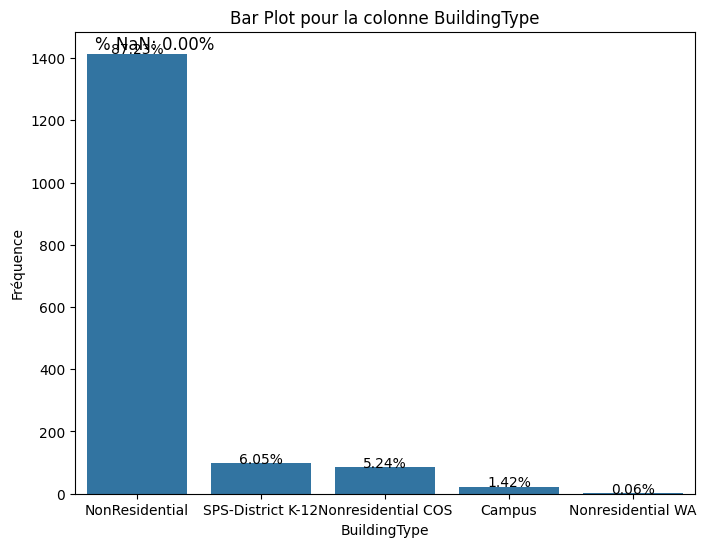

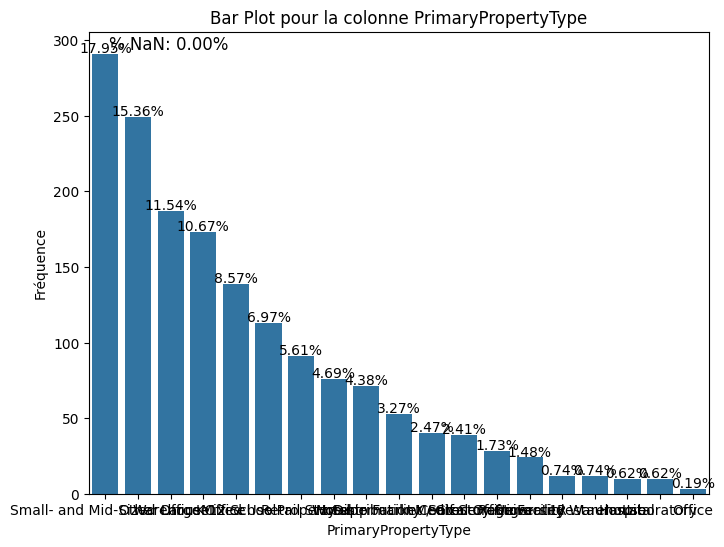

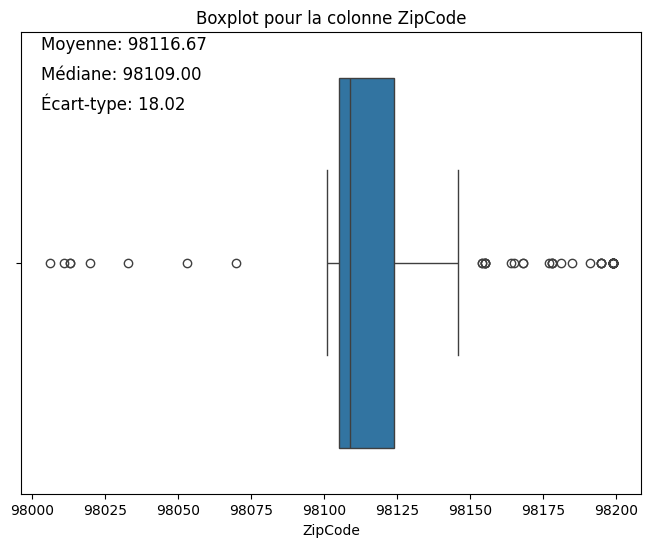

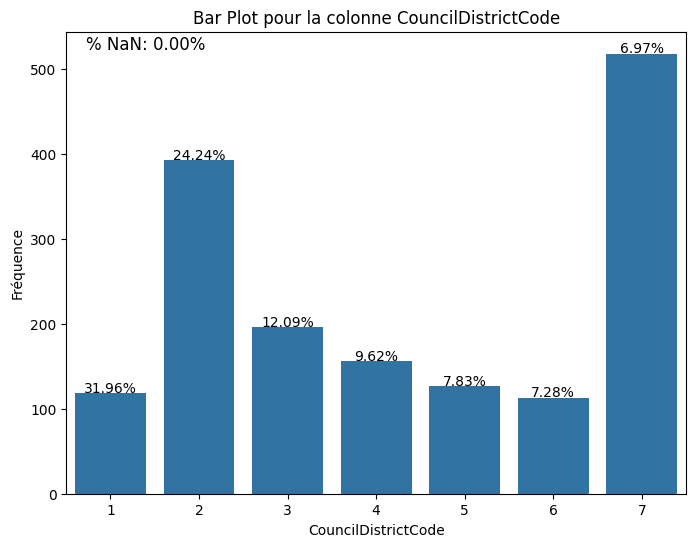

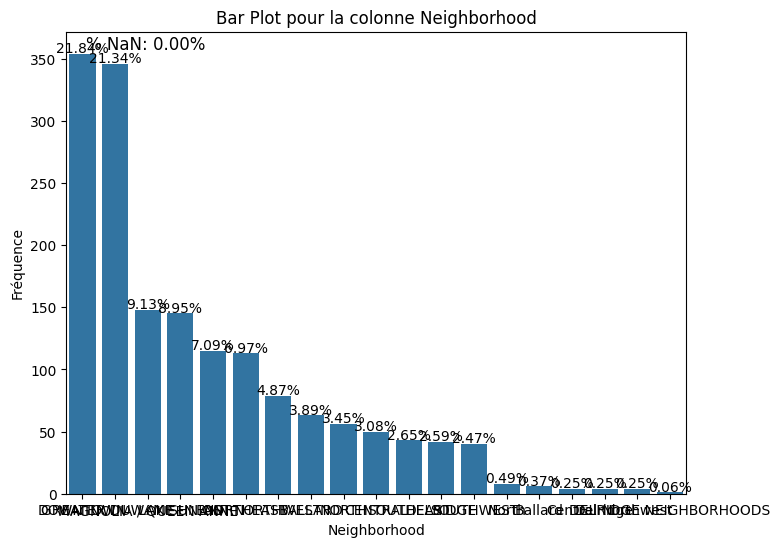

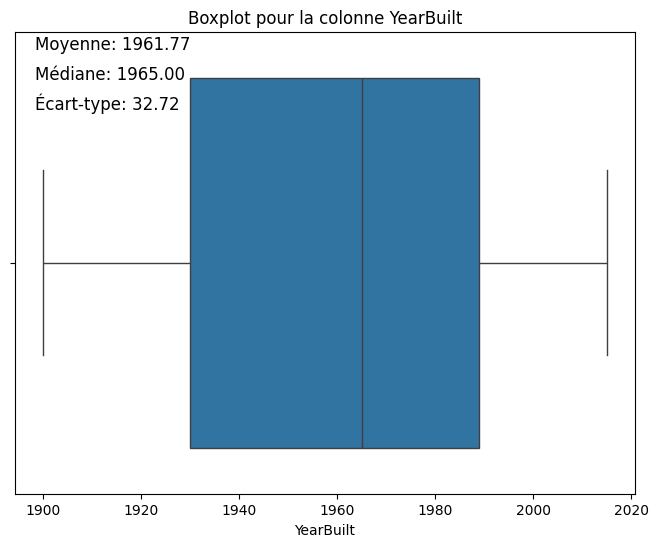

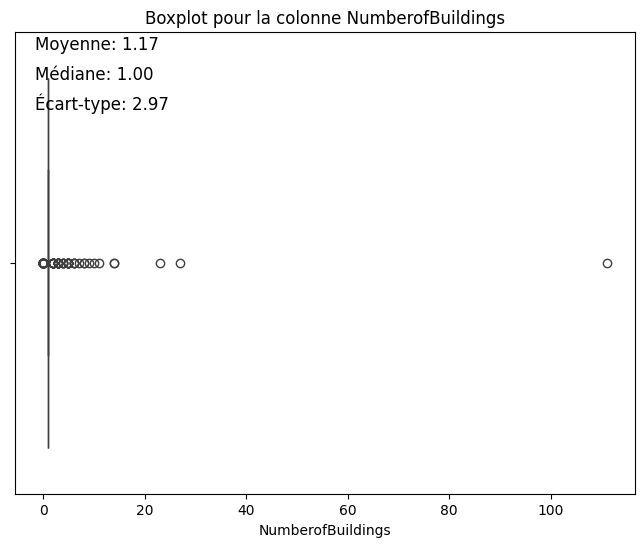

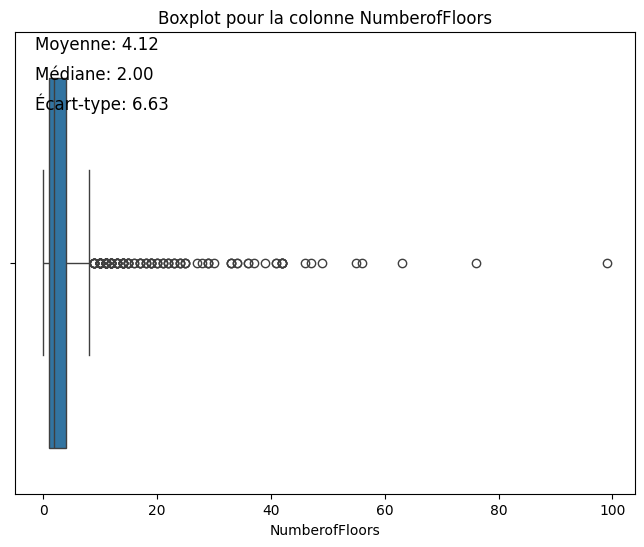

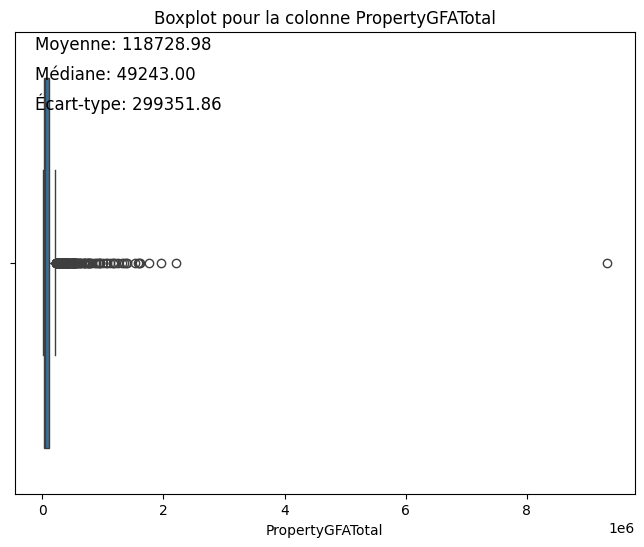

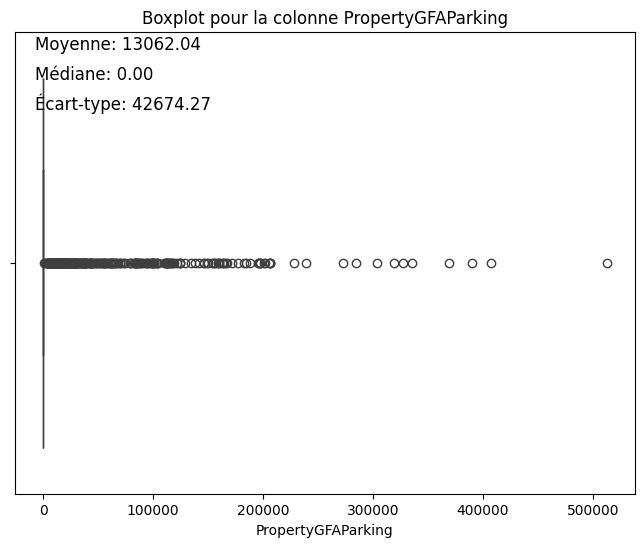

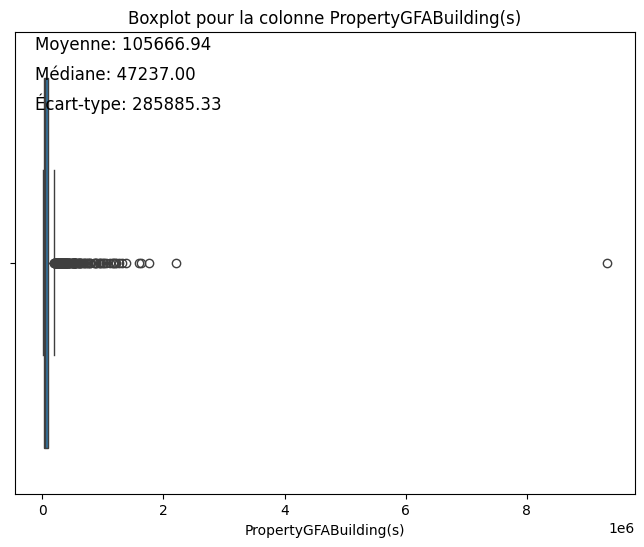

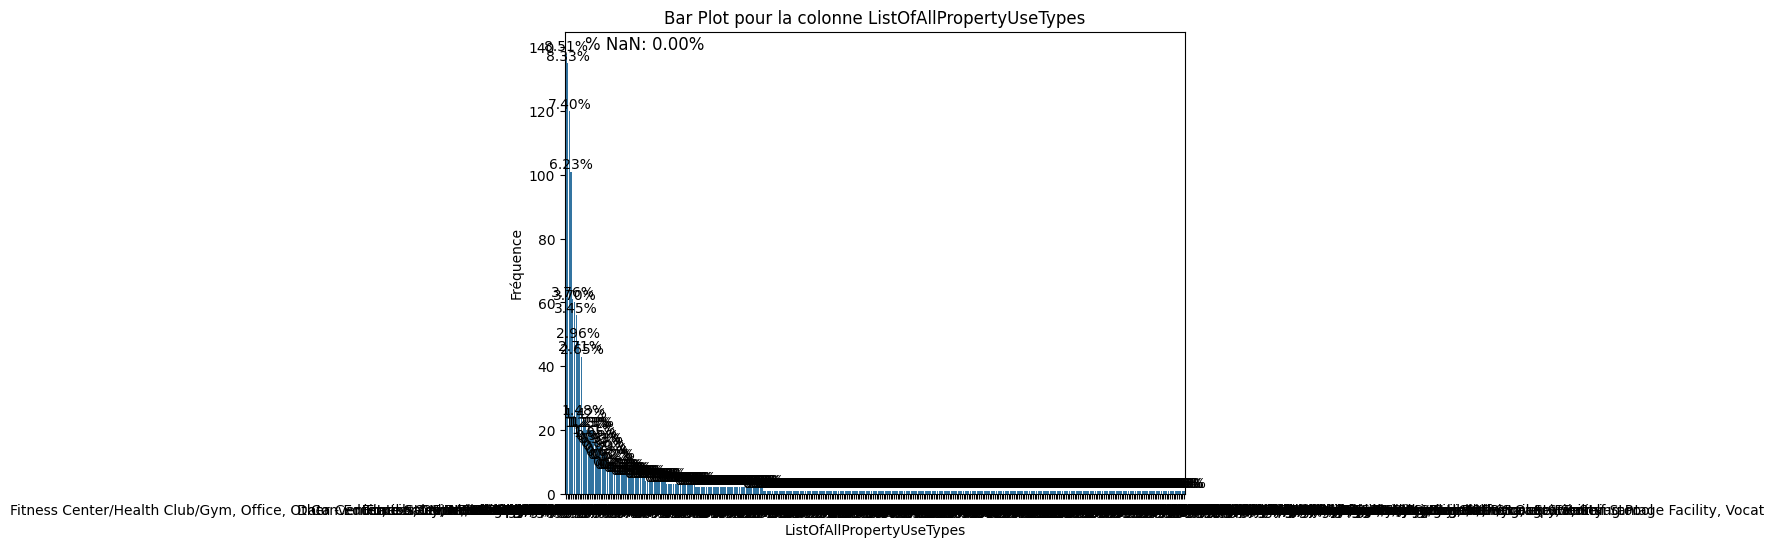

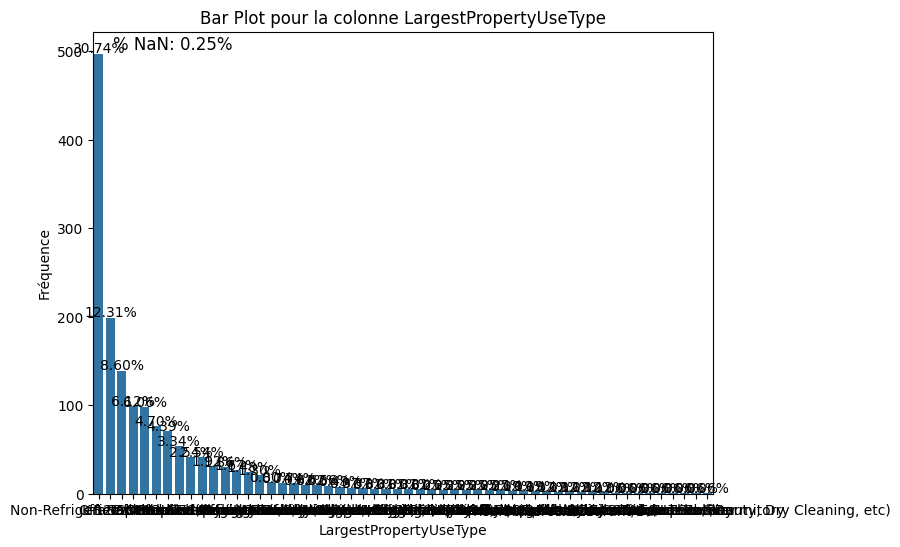

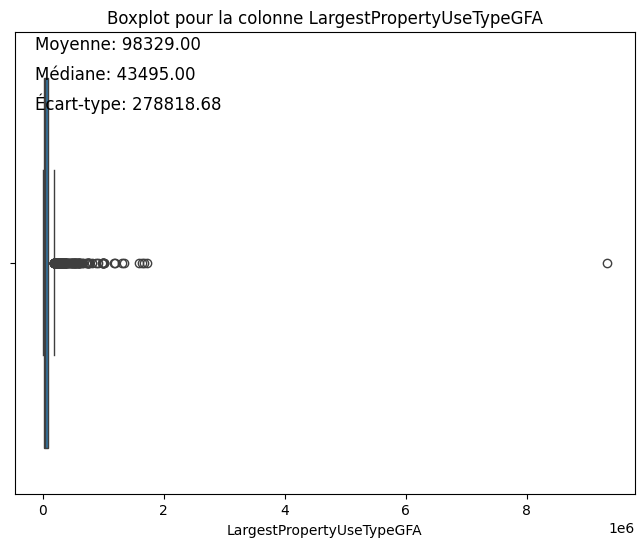

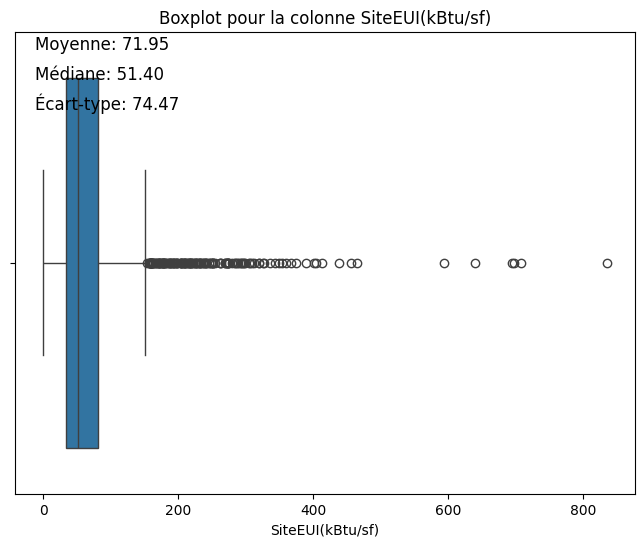

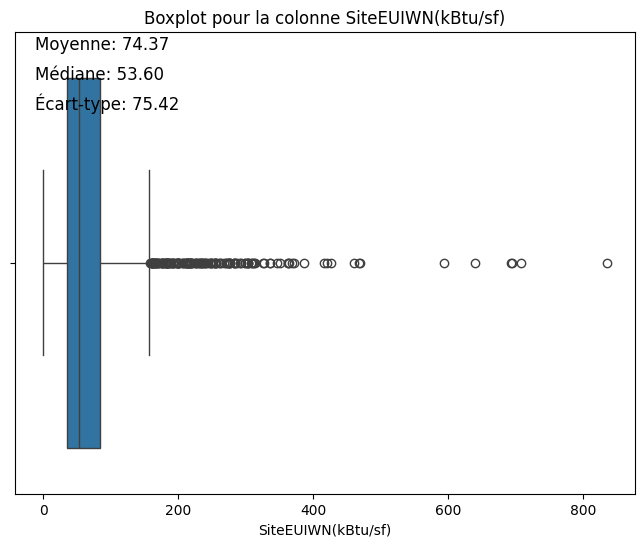

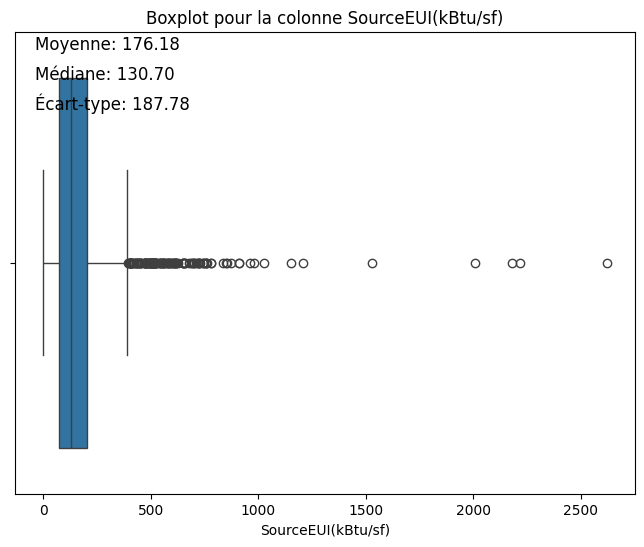

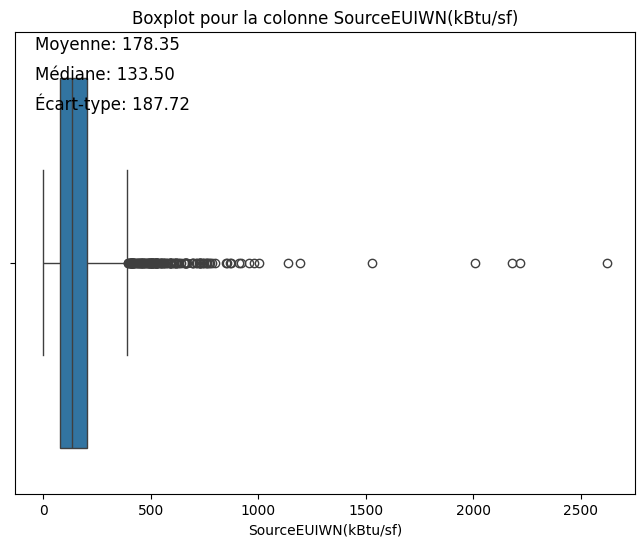

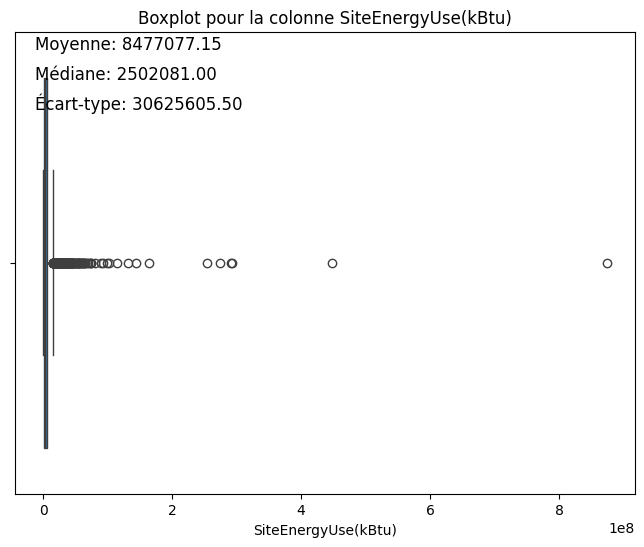

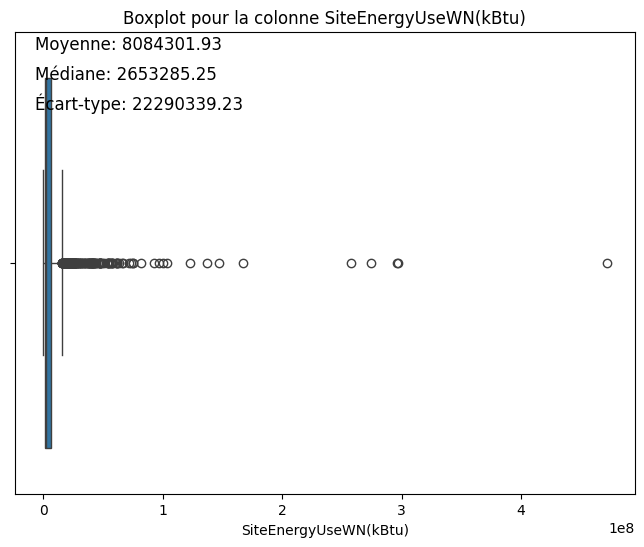

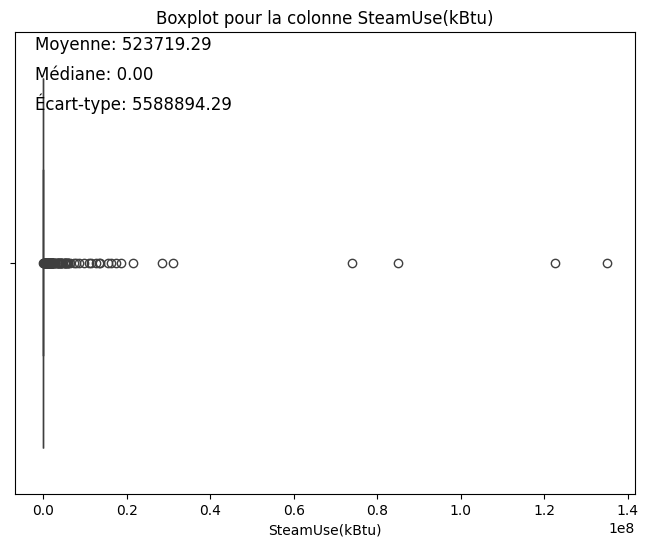

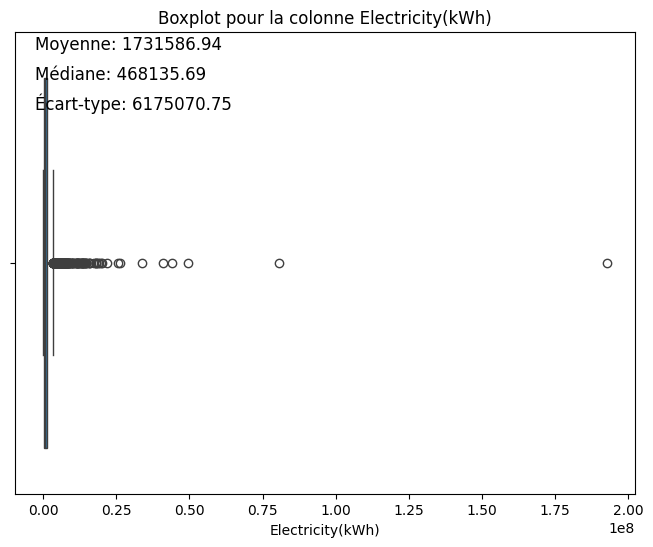

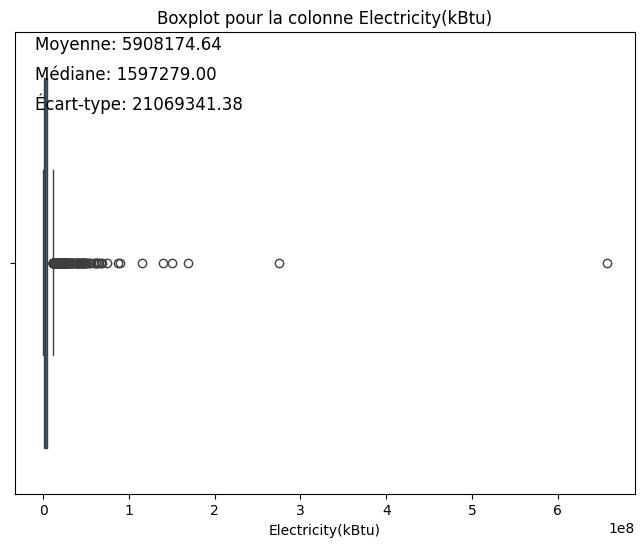

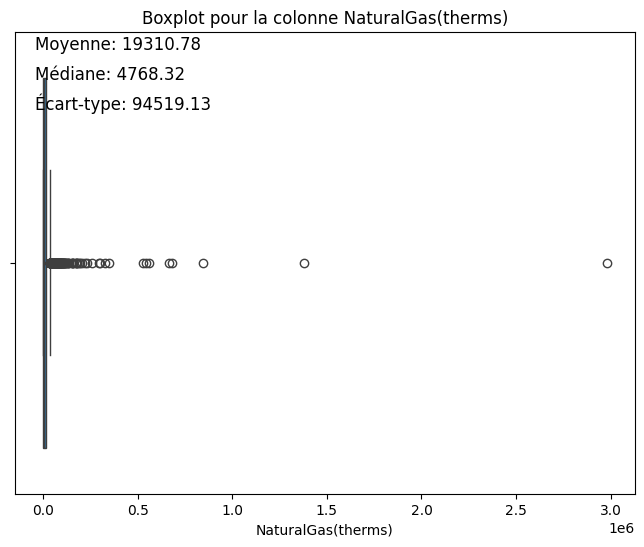

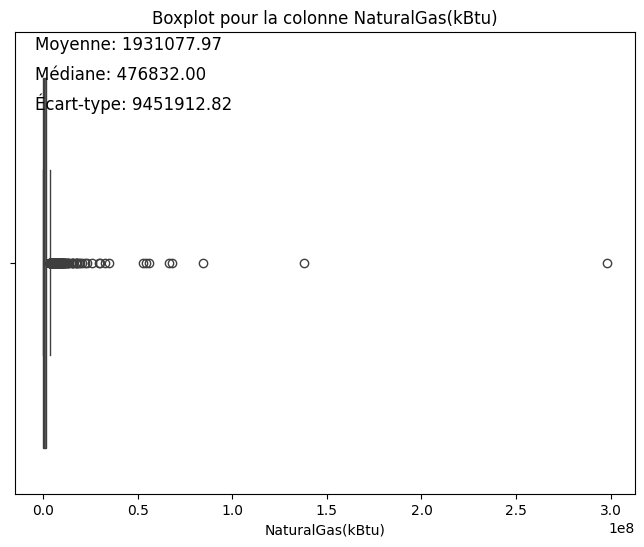

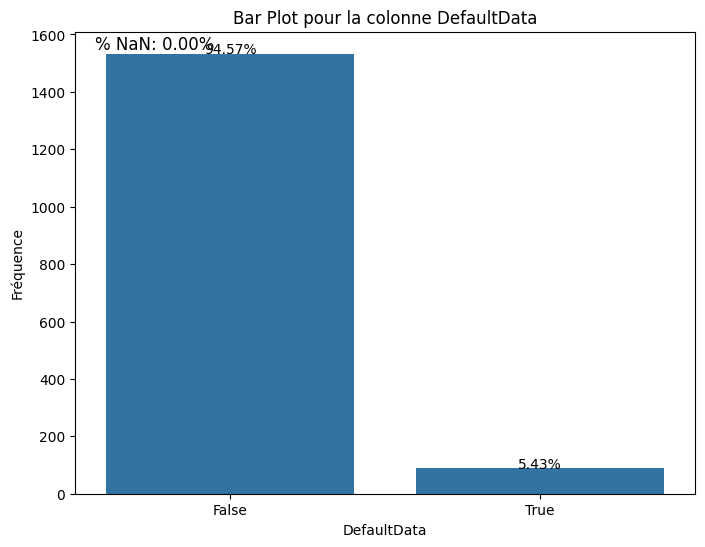

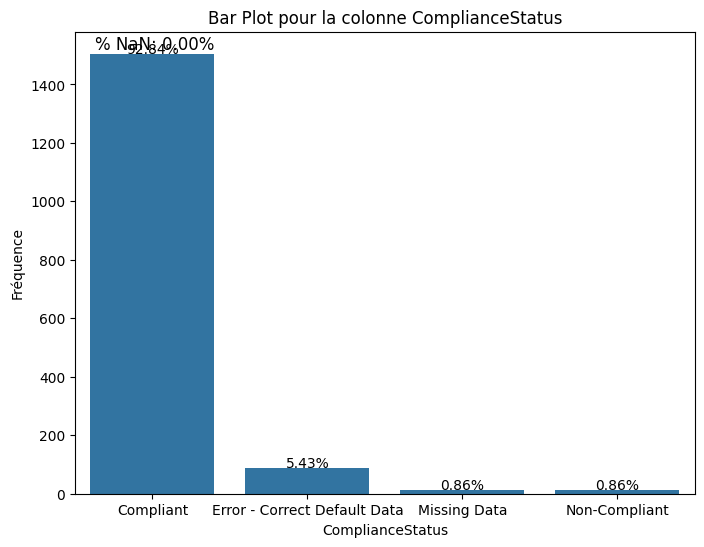

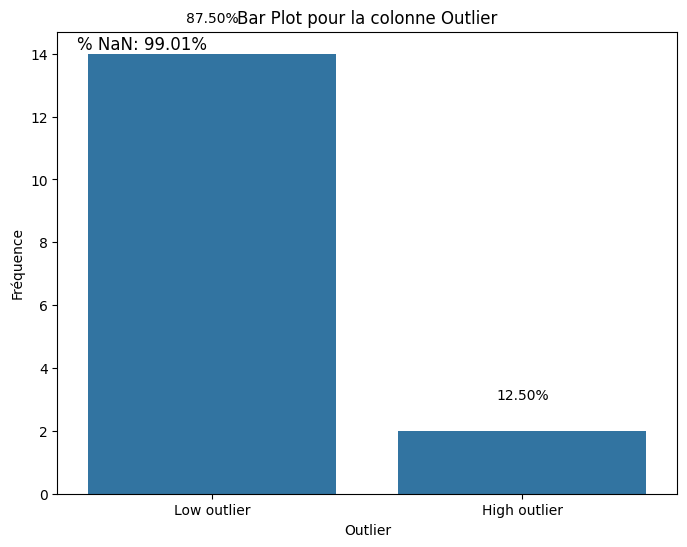

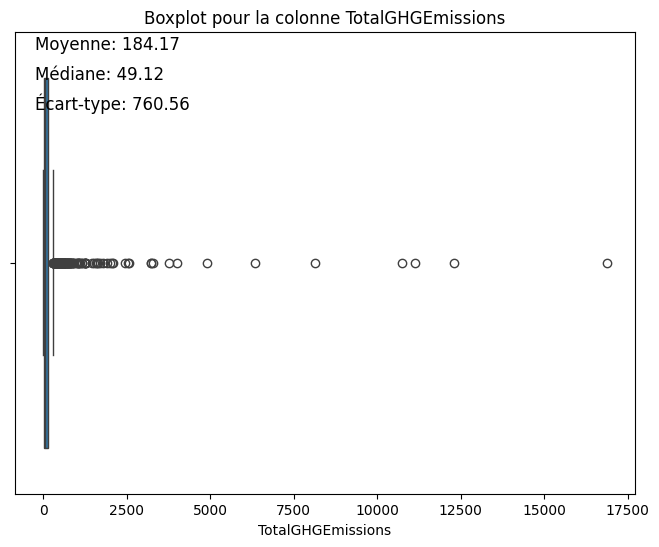

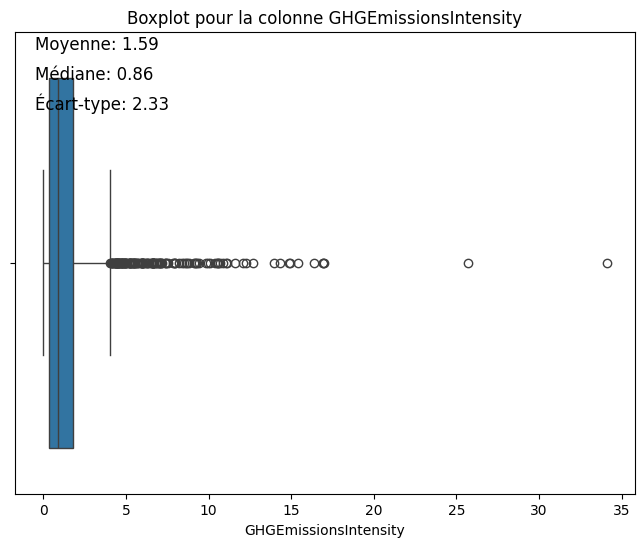

In [327]:
my_functions.plot_column_analysis(building_consumption,column_types)

#### Matrice de corrélation

In [328]:
correlation_df = my_functions.analyze_correlations(building_consumption)

c:\Users\Maeva\Documents\OpenClassRoom\P6_Machine Learning\p6_machine_learning\Notebooks\my_functions.py:184: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  # Vérifier qu'il y a au moins deux groupes avec des données valides
c:\Users\Maeva\Documents\OpenClassRoom\P6_Machine Learning\p6_machine_learning\Notebooks\my_functions.py:184: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  # Vérifier qu'il y a au moins deux groupes avec des données valides
c:\Users\Maeva\Documents\OpenClassRoom\P6_Machine Learning\p6_machine_learning\Notebooks\my_functions.py:184: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  # Vérifier qu'il y a au moins deux groupes avec des données valides
c:\Users\Maeva\Documents\Ope

In [329]:
correlation_df[correlation_df["Column 1"] == "SiteEUI(kBtu/sf)"].sort_values("p-value")

,Column 1,Column 2,p-value,Correlation Coefficient
315,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),5.117984e-17,0.997054
317,SiteEUI(kBtu/sf),SourceEUIWN(kBtu/sf),8.192474e-13,0.988218
316,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),4.022920e-11,0.979381
318,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),3.000120e-08,0.946284
319,SiteEUI(kBtu/sf),SiteEnergyUseWN(kBtu),3.000120e-08,0.946284
321,SiteEUI(kBtu/sf),Electricity(kWh),7.225045e-08,0.938926
322,SiteEUI(kBtu/sf),Electricity(kBtu),7.225045e-08,0.938926
329,SiteEUI(kBtu/sf),GHGEmissionsIntensity,1.262863e-06,0.906946
328,SiteEUI(kBtu/sf),TotalGHGEmissions,6.385654e-06,0.881531
327,SiteEUI(kBtu/sf),Outlier,2.611402e-02,None


#### Export DF en fichier csv

In [330]:
building_consumption.to_csv('building_consumption_analized.csv', index=False)
suivi_colonnes.to_csv('building_consumption_columns_tracking.csv', index=False)